# **1. Matematisk bakgrund**

## **Vad är en shot-noise-process?**

En **shot-noise-process** (eller pulsslagsprocess) modellerar en signal
som uppstår genom att en följd av slumpmässiga händelser (t.ex.
partiklar som träffar en detektor, elektroner som passerar en barriär,
eller kunder som anländer till ett system) var och en genererar en
transient respons — ofta en avtagande funktion som en exponentiell puls.

Matematiskt kan processen skrivas som:

$$\begin{equation*}
    X(t) = \sum_{i: T_i \leq t} h(t - T_i),
\end{equation*}$$

där

- $\{T_i\}$ är ankomsttider från en **poissonprocess** med intensitet
  $\lambda
     > 0$,
- $h(\cdot)$ är en **responsfunktion** (pulse shape) t.ex.
  $$ h(t) = e^{-t/\tau} \mathbf{1}_{t \geq 0}. $$

## **Egenskaper**

- **Stationär**: Om Poissonprocessen är homogen och $h$ är fix så är
  $X(t)$ en stationär stokastisk process.

- **Medelvärde**:  
  $$\begin{equation*}
       \mathbb{E}[X(t)] = \lambda \int_0^\infty h(s)\, ds.
     \end{equation*}$$

- **Autokovariansfunktion**:  
  $$\begin{equation*}
       C_X(\tau) = \lambda \int_0^\infty h(s) h(s + |\tau|)\, ds.
     \end{equation*}$$

- **Spektraltäthet** (via Wiener–Khinchin-satsen):  
  *S*<sub>*X*</sub>(*f*) = *λ* \|ℱ{*h*}(*f*)\|<sup>2</sup>, där
  $\mathcal{F}\{h\}$ är Fouriertransformen av $h$.

För exponentiell puls $h(t) = e^{-t/\tau} \mathbf{1}_{t \geq 0}$: -
$\mathbb{E}[X] = \lambda \tau$, - $C_X(\tau) = \frac{\lambda \tau}{2}
e^{-|\tau|/\tau}$, -
$S_X(f) = \frac{\lambda \tau^2}{1 + (2\pi f \tau)^2}$ — ett så kallat
*Lorentz-spektrum*.

------------------------------------------------------------------------

# **2. Python-implementation**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, correlate
#import seaborn as sns

# sns.set(style='whitegrid')
np.random.seed(42)

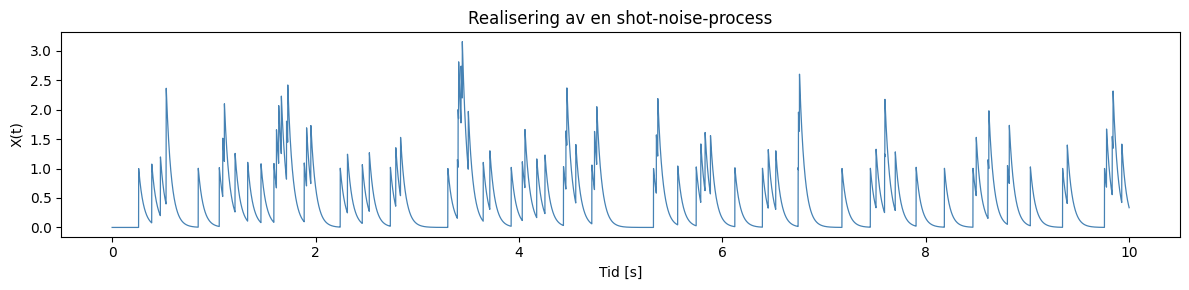

In [15]:
# ----------------------------
# Parametrar
# ----------------------------
T = 10.0           # total tid [s]
dt = 0.001         # tidssteg [s]
t = np.arange(0, T, dt)
lam = 10           # Poissonintensitet lambda [händelser/s]
pulstid = 0.05     # pulsens tidskonstant [s]

# ----------------------------
# Bygg punktprocessen Z
# ----------------------------

Z = np.random.binomial(1,lam*dt,len(t))

# ----------------------------
# Shot-noise processen är h*Z
# ----------------------------

t1 = t[t<1.0]
h = np.exp(-t1/pulstid)

X = np.convolve(Z,h)[:len(t)]

# ----------------------------
# Plotta realisering
# ----------------------------
plt.figure(figsize=(12, 3))
plt.plot(t, X, lw=0.9, color='steelblue')
plt.title('Realisering av en shot-noise-process')
plt.xlabel('Tid [s]')
plt.ylabel('X(t)')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------

# **3. Skattning av autokorrelation och spektraltäthet**

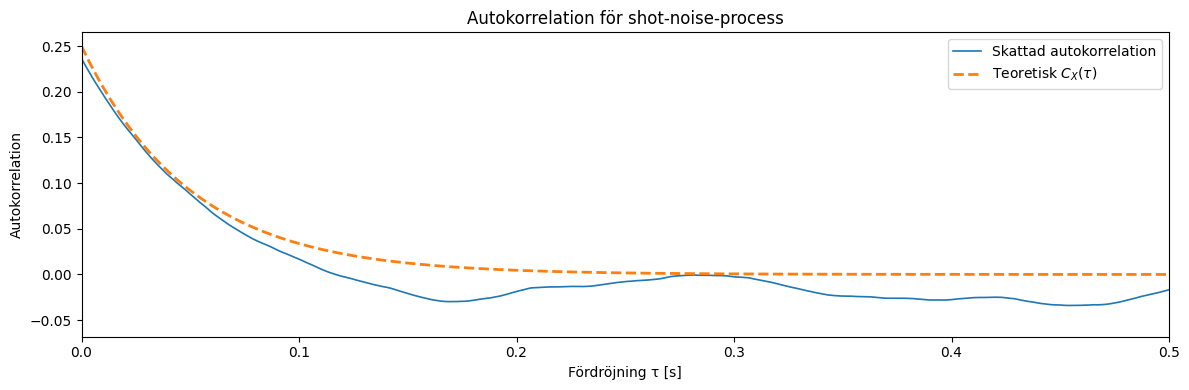

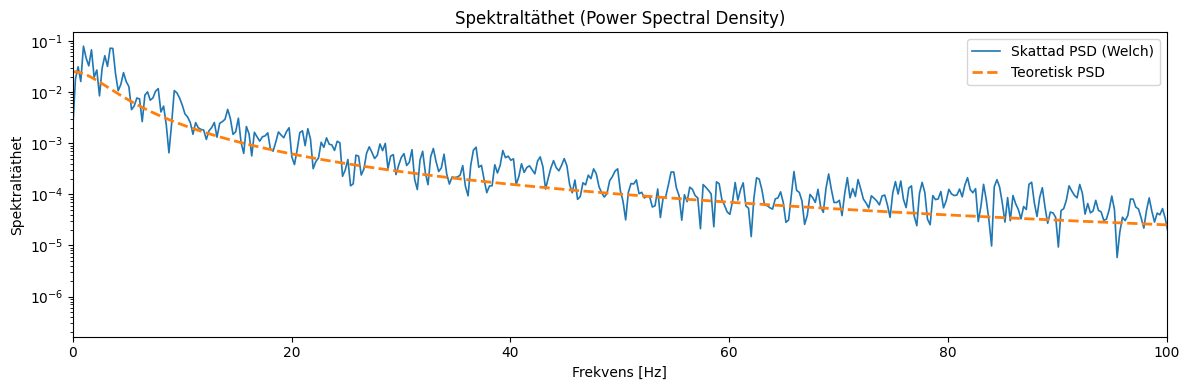

In [11]:
# ----------------------------
# Skatta autokorrelation (via korrelation)
# ----------------------------
# Centrera
X_centered = X - np.mean(X)
# Beräkna korrelation (biased estimator)
corr = correlate(X_centered, X_centered, mode='full') / len(X)
lags = np.arange(-len(corr)//2 + 1, len(corr)//2 + 1) * dt
mid = len(corr) // 2
corr = corr[mid:]  # endast icke-negativa lags
lags = lags[mid:]

# Teoretisk autokovarians
C_theory = (lam * pulstid / 2) * np.exp(-lags / pulstid)

plt.figure(figsize=(12, 4))
plt.plot(lags, corr[:len(lags)], label='Skattad autokorrelation', lw=1.2)
plt.plot(lags, C_theory, '--', label='Teoretisk $C_X(\\tau)$', lw=2)
plt.xlim(0, 0.5)
plt.xlabel('Fördröjning τ [s]')
plt.ylabel('Autokorrelation')
plt.legend()
plt.title('Autokorrelation för shot-noise-process')
plt.tight_layout()
plt.show()

# ----------------------------
# Skatta spektraltäthet (PSD) med Welch
# ----------------------------
f, Pxx = welch(X, fs=1/dt, nperseg=4096, scaling='density')

# Teoretisk PSD
S_theory = lam * pulstid**2 / (1 + (2 * np.pi * f * pulstid)**2)

plt.figure(figsize=(12, 4))
plt.semilogy(f, Pxx, label='Skattad PSD (Welch)', lw=1.2)
plt.semilogy(f, S_theory, '--', label='Teoretisk PSD', lw=2)
plt.xlim(0, 100)
plt.xlabel('Frekvens [Hz]')
plt.ylabel('Spektraltäthet')
plt.legend()
plt.title('Spektraltäthet (Power Spectral Density)')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------

# **4. Tillämpningar av shot-noise-modellen**

Shot-noise-processer är centrala i många fysikaliska och tekniska
sammanhang:

| **Tillämpningsområde**      | **Interpretation**                                                                     |
|-----------------------------|----------------------------------------------------------------------------------------|
| **Elektronik**              | Brus i dioder/transistorer orsakat av diskreta elektroner (Schottky-brus).             |
| **Optik / fotonik**         | Fotoner som träffar en fotodetektor ger pulser — används i kvantoptik och LIDAR.       |
| **Teletrafik / nätverk**    | Ankomster av paket eller samtal i ett nätverk kan modelleras som shot noise.           |
| **Finans**                  | Stora, plötsliga transaktioner eller nyhetschocker kan ses som pulser i prisprocesser. |
| **Neurovetenskap**          | Postsynaptiska potentialer som svar på frisläppta neurotransmittorer.                  |
| **Sjukvård / epidemiologi** | Smittspridning som pulser av infektioner (i förenklade modeller).                      |

------------------------------------------------------------------------

# **5. Diskussion**

- Shot-noise är **icke-gaussisk** men blir approximativt gaussisk vid
  hög ankomstfrekvens (centrala gränsvärdessatsen).
- Modellen är **linjär**: superposition av oberoende pulser.
- Den är **minneslös** i punktprocessen, men **har minne** via
  pulsformen $h(t)$.
- Vid analys av verkliga data kan man använda skattningar av PSD eller
  högre ordningens kumulanter för att testa om en shot-noise-modell är
  lämplig.